In [80]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')


dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [81]:
# import the yr1c1c1 labels
dir_csv = 'outputs/labels_cleaned_y1y2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')
# import the yr2 labels
dir_csv2 = 'outputs/labels_cleaned_y2.csv'
df = pd.read_csv(dir_csv2, encoding='utf-8')

# -- TF-IDF, RL ---
X_t2 = np.array(ml_tools.tf_idf(df['Content'].tolist()), dtype = object)
X_t2 = X_t2[1]
y_t2 = df['ReasoningLevel'].tolist()# -- Bag of Words, RL ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b2 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b2)
y_b2 = lb.transform(y_b2)



# Datasets: BOW and TF-IDF

In [82]:

# -- TF-IDF ---
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()[:83]), dtype = object)
print(len(X_t[1]))
X_t = X_t[1]
#print(len(X_t))
#print(X_t)
y_t = df['ReasoningLevel'].tolist()[:83]
#print(len(y_t))
#print(y_t)

# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b1 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b1)
y_b = lb.transform(y_b1)




83


# Mock NN for loss function

In [85]:
# --- splitting tfidf data -- 
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.9)
print(X_t.shape)
print(len(y_t))

(83, 5451)
83


In [86]:
# --- splitting bow data -----
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b2 , train_size = 0.8)
input = X_train_b.shape[1] # input for NN
print(input)

5451


In [79]:
#---- Neural network function -----
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(10, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history


nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                54520     
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
 flatten_21 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 54,531
Trainable params: 54,531
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 129ms/step - loss: 2.6792 - accuracy: 0.4091 - val_loss: 2.0658 - val_accuracy: 0.7500
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.1893 - accuracy: 0.7500 - val_loss: 2.0289 - val_accuracy: 0.7500
Epoch 3/1000
3/3 [============

KeyboardInterrupt: 

In [4]:
# --- getting the accuracy values ----
acc = nn1.history['accuracy']

# --- put in a pandas dataframe  ----
accu_val  = pd.DataFrame(acc, columns= ['accuracy'])

# --- mean and standard error mean values (sem) ---
mean_val_acc= sum(acc)/len(acc)
sem_val     = sem(acc)

NameError: name 'nn1' is not defined

# Hyper Parameter tuning 

# Neural Network (NN) function and plot

In [13]:
# ---- FE and ML labels used ----
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] 

In [17]:
def NN_dataframe(X, y,t_size,epoch_no,str_dataname,str_featext,str_year,dir):
    accuracies = []
    accuracies_sem = []
    dummy = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])

    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))

    dict_rl = {'trainsize':train_sizes, 'accuracy':accuracies, 'sem': accuracies_sem}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year), dir)
    name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow, name


def plot(dframe_train, dframe_acc, dframe_sem):
    plt.plot(dframe_train, dframe_acc, 'o')
    plt.errorbar(dframe_train, dframe_acc, yerr = dframe_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')

    # save figure 
    # filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
    # plt.savefig(filepath)
    return
        



# Reasoning Level - BOW

In [24]:
acc_RL_bow            = NN_dataframe(wordvec_counts, y_b, train_sizes, 1000, 'Epist', 'BOW', 'y1c1c2', dir_name_e)
acc_RL_bow_df         = acc_RL_bow[0]
RL_bow_picklefilename = acc_RL_bow[1]

ValueError: Found input variables with inconsistent numbers of samples: [83, 95]

In [27]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL-BOW
#===========================================================================================================================================
unpickled_rl_bow_df = utils.load_pickle_file_to_df(RL_bow_picklefilename ,dir_name_e)

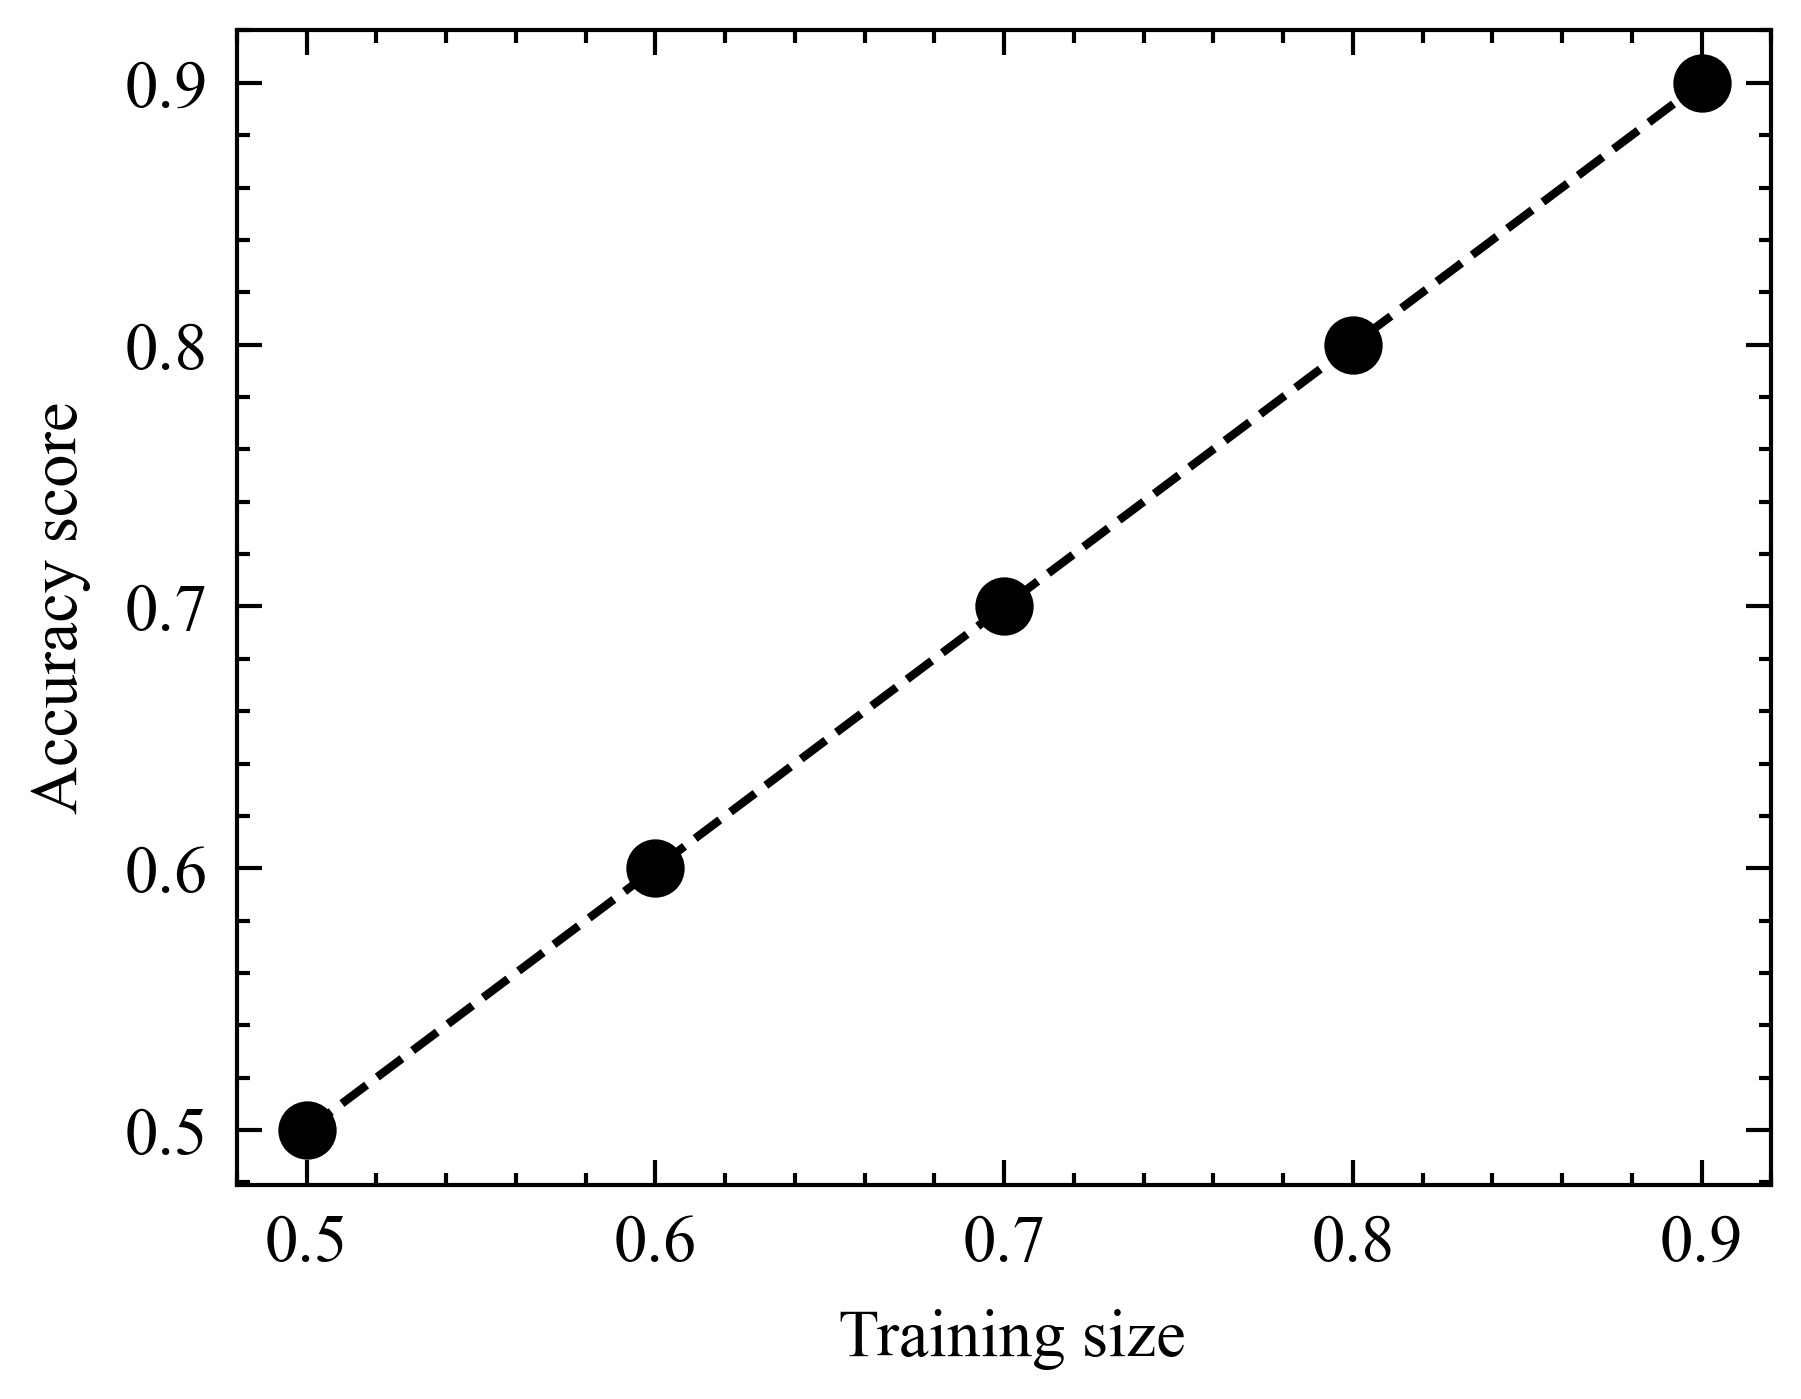

In [28]:
acc_plot_RL = plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], unpickled_rl_bow_df['sem'])

In [15]:
# -- Bag of Words --- Argument level
wordvec_names_a, wordvec_counts_a= ml_tools.BoW(df['Content'].tolist())
y_b_al = df['ArgumentLevel'].tolist()

# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b_al)
y_b_al= lb.transform(y_b_al)

acc_AL_bow            = NN_dataframe(wordvec_counts_a, y_b_al, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_AL_bow_df         = acc_AL_bow[0]
AL_bow_picklefilename = acc_AL_bow[1]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                47160     
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
 flatten_7 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 179ms/step - loss: 1.5223 - accuracy: 0.8000 - val_loss: 0.7125 - val_accuracy: 0.7875
Epoch 2/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8088 - accuracy: 0.6468 - val_loss: 0.8590 - val_accuracy: 0.5375
Epoch 3/1000
2/2 [=============

In [80]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL-BOW
#===========================================================================================================================================
unpickled_al_bow = utils.load_pickle_file_to_df(AL_bow_picklefilename, dir_name_e)


NameError: name 'AL_bow_picklefilename' is not defined

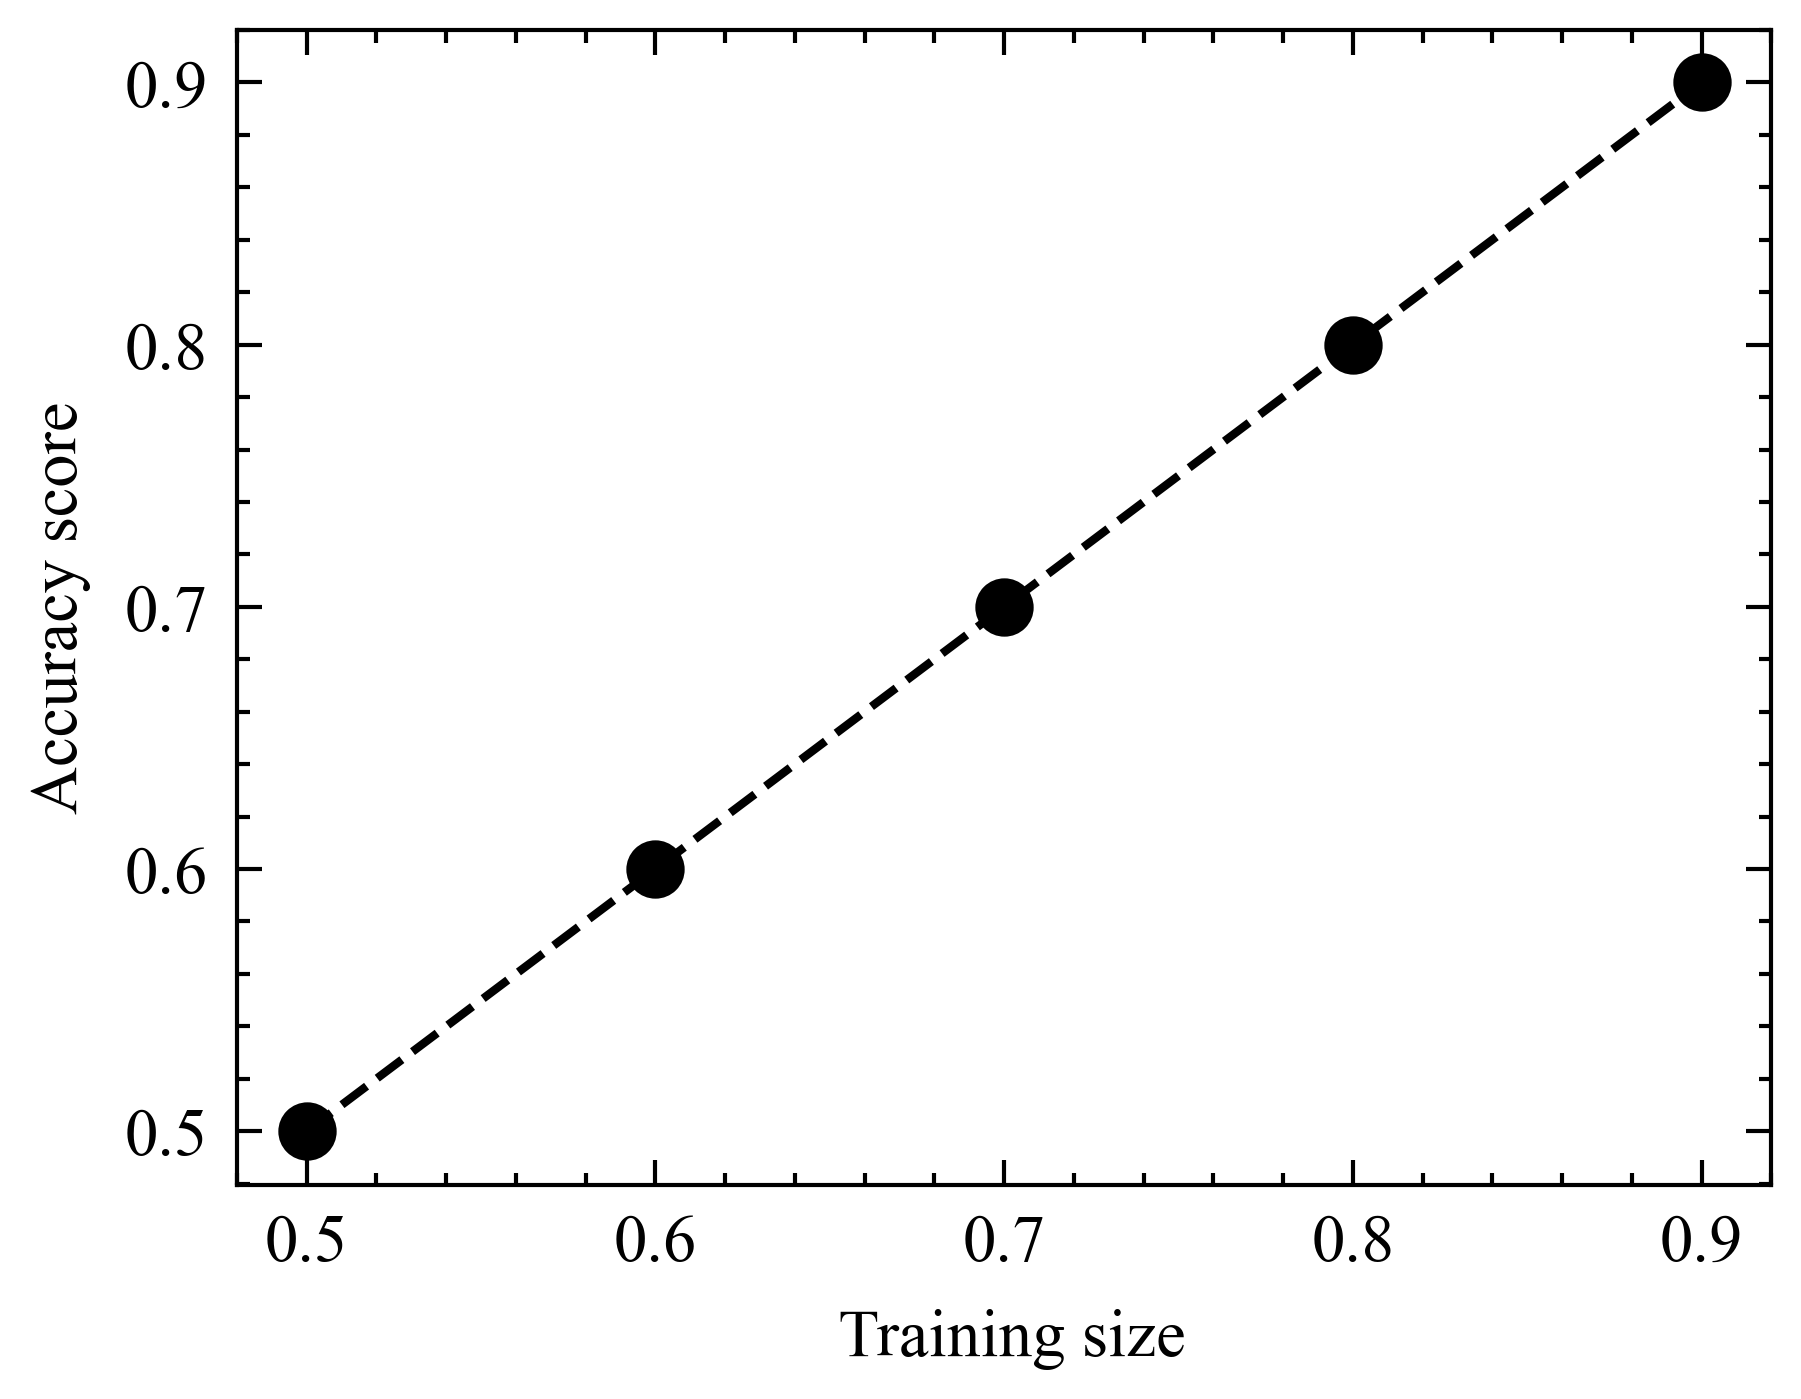

In [17]:
acc_plot_AL = plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], unpickled_al_bow['sem'])

# TF-IDF Epistomology - RL

In [33]:
# -- Feature extraction: TF-IDF, RL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t = df['ReasoningLevel'].tolist()

# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)
acc_TFIDF_bow              = NN_dataframe(X_t, y_t, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_TFIDF_bow_df           = acc_AL_bow[0]
RL_TFIDF_picklefilename    = acc_AL_bow[1]
# -- unpickled reasoning level tfidf
unpickled_rl_tfidf = utils.load_pickle_file_to_df(RL_TFIDF_picklefilename,dir_name_e)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                47160     
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
 flatten_28 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 187ms/step - loss: 0.6957 - accuracy: 0.3883 - val_loss: 0.6861 - val_accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.6834 - accuracy: 0.7394 - val_loss: 0.6763 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [============

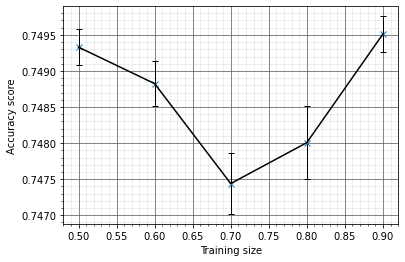

In [49]:
acc_plot_RL_tfidf = plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], unpickled_rl_tfidf['sem'])

# TF-IDF Epistomology - AL

In [42]:
# -- Feature extraction: TF-IDF, AL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t2= df['ArgumentLevel'].tolist()
# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t2)
y_t2 = lb.transform(y_t2)

# ---  NN training, pickling  --- 
acc_al_tfidf            =  NN_dataframe(X_t, y_t2, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_al_tfidf_df         = acc_al_tfidf[0]
AL_TFIDF_picklefilename = acc_al_tfidf[1]
unpickled_al_tfidf      = utils.load_pickle_file_to_df(AL_TFIDF_picklefilename,dir_name_e)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                47160     
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
 flatten_6 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


ValueError: in user code:

    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 4715), found shape=(None, 5451)


In [81]:
plot_tfidf_al = plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], unpickled_al_tfidf['sem'])

NameError: name 'unpickled_al_tfidf' is not defined

No handles with labels found to put in legend.


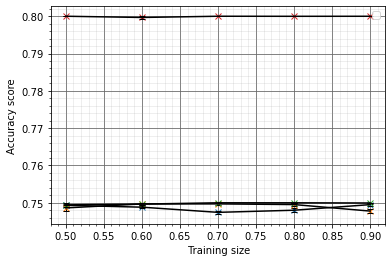

In [53]:
# --- All graphs on one plot
plt.plot(train_sizes, accuracies, 'x')
plt.errorbar(train_sizes, accuracies, yerr = accuracies_sem, markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(train_sizes, accuracies_al, 'x')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_rlt, 'x')
plt.errorbar(train_sizes, accuracies_rlt, yerr = accuracies_sem_rlt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_alt, 'x')
plt.errorbar(train_sizes, accuracies_alt, yerr = accuracies_sem_alt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('TF-IDF - RL - NN - 1000 epochs')
plt.legend()
#filepath = 'outputs/NN-tfidf-AL-1000 epoch'
#plt.savefig(filepath)

# Year 2 

In [11]:
# import the yr2 labels
dir_csv2 = 'outputs/labels_cleaned_y2.csv'
df = pd.read_csv(dir_csv2, encoding='utf-8')

# -- TF-IDF, RL ---
X_t2 = np.array(ml_tools.tf_idf(df['Content'].tolist()), dtype = object)
X_t2 = X_t2[1]
y_t2 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_t2)
y_t2 = lb.transform(y_t2)

#TF-IDF, AL
y_t2_al = df['ArgumentLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_t2_al)
y_t2_al= lb.transform(y_t2_al)

# -- Bag of Words, RL ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b2 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b2)
y_b2 = lb.transform(y_b2)

#--- Bag of words, AL --- 
y_b2_al = df['ArgumentLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b2_al)
y_b2_al = lb.transform(y_b2_al)

In [12]:
print('X_t shape', len(X_t2))
print('y_t2 shape', len(y_t2))
print('y_t2_al shape', len(y_t2_al))
print('wordvec_counts', len(wordvec_counts))
print('y_b2 shape', len(y_b2))
print('y_b2_al shape', len(y_b2_al))

X_t shape 83
y_t2 shape 83
y_t2_al shape 83
wordvec_counts 83
y_b2 shape 83
y_b2_al shape 83


In [13]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b2 , train_size = 0.5)
print(X_train_b.shape)
print(y_train_b.shape)

(41, 5451)
(41, 4)


In [14]:
acc_y2            = NN_dataframe(wordvec_counts, y_b2, train_sizes, 1000, 'RL', 'BOW', 'y2', dir_name_e)
acc_y2_df         = acc_y2[0]
acc_bow_y2        = acc_y2[1]

TypeError: Dimension value must be integer or None or have an __index__ method, got value '<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x000001E6A969CA00>>' with type '<class 'method'>'

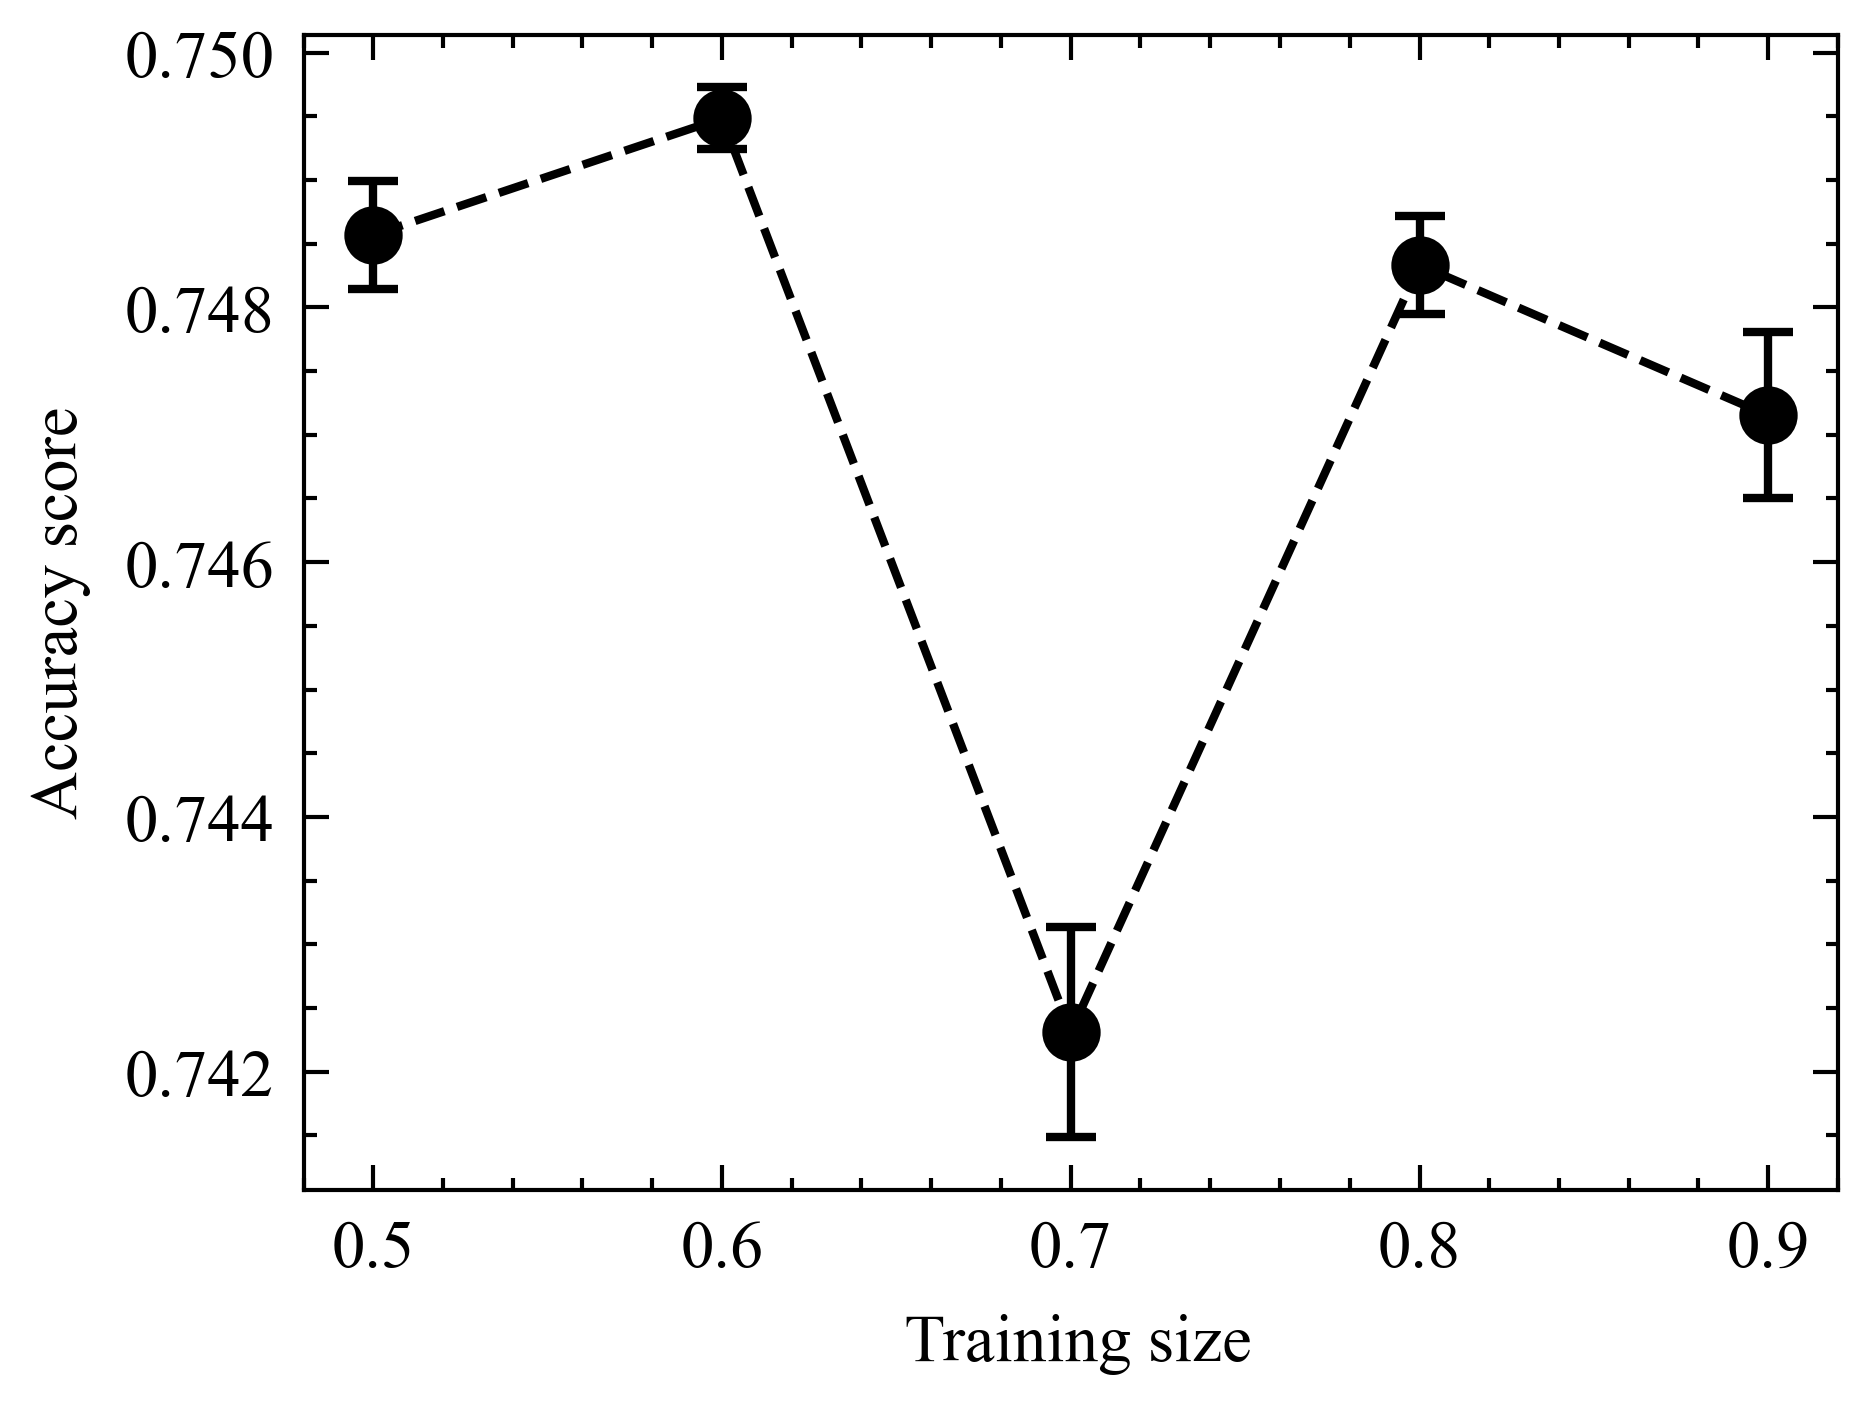

In [47]:
unpickled_y2_bow = utils.load_pickle_file_to_df('NN_RL_BOW_trainsize_accuracy_sem_1000ephs_y2', dir_name_e)
acc_y2_plot = plot(unpickled_y2_bow['trainsize'], unpickled_y2_bow['accuracy'], unpickled_y2_bow['sem'])

In [37]:
# bow - AL
acc_y2_al          = NN_dataframe(wordvec_counts, y_b2_al, train_sizes, 1000, 'AL', 'BOW', 'y2', dir_name_e)
acc_y2_df_al       = acc_y2_al[0]
acc_bow_y2_al     = acc_y2_al[1]

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                109040    
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
 flatten_6 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 109,061
Trainable params: 109,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 184ms/step - loss: 0.9967 - accuracy: 0.6537 - val_loss: 0.7997 - val_accuracy: 0.5714
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7338 - accuracy: 0.6244 - val_loss: 1.0692 - val_accuracy: 0.8000
Epoch 3/1000
2/2 [===========

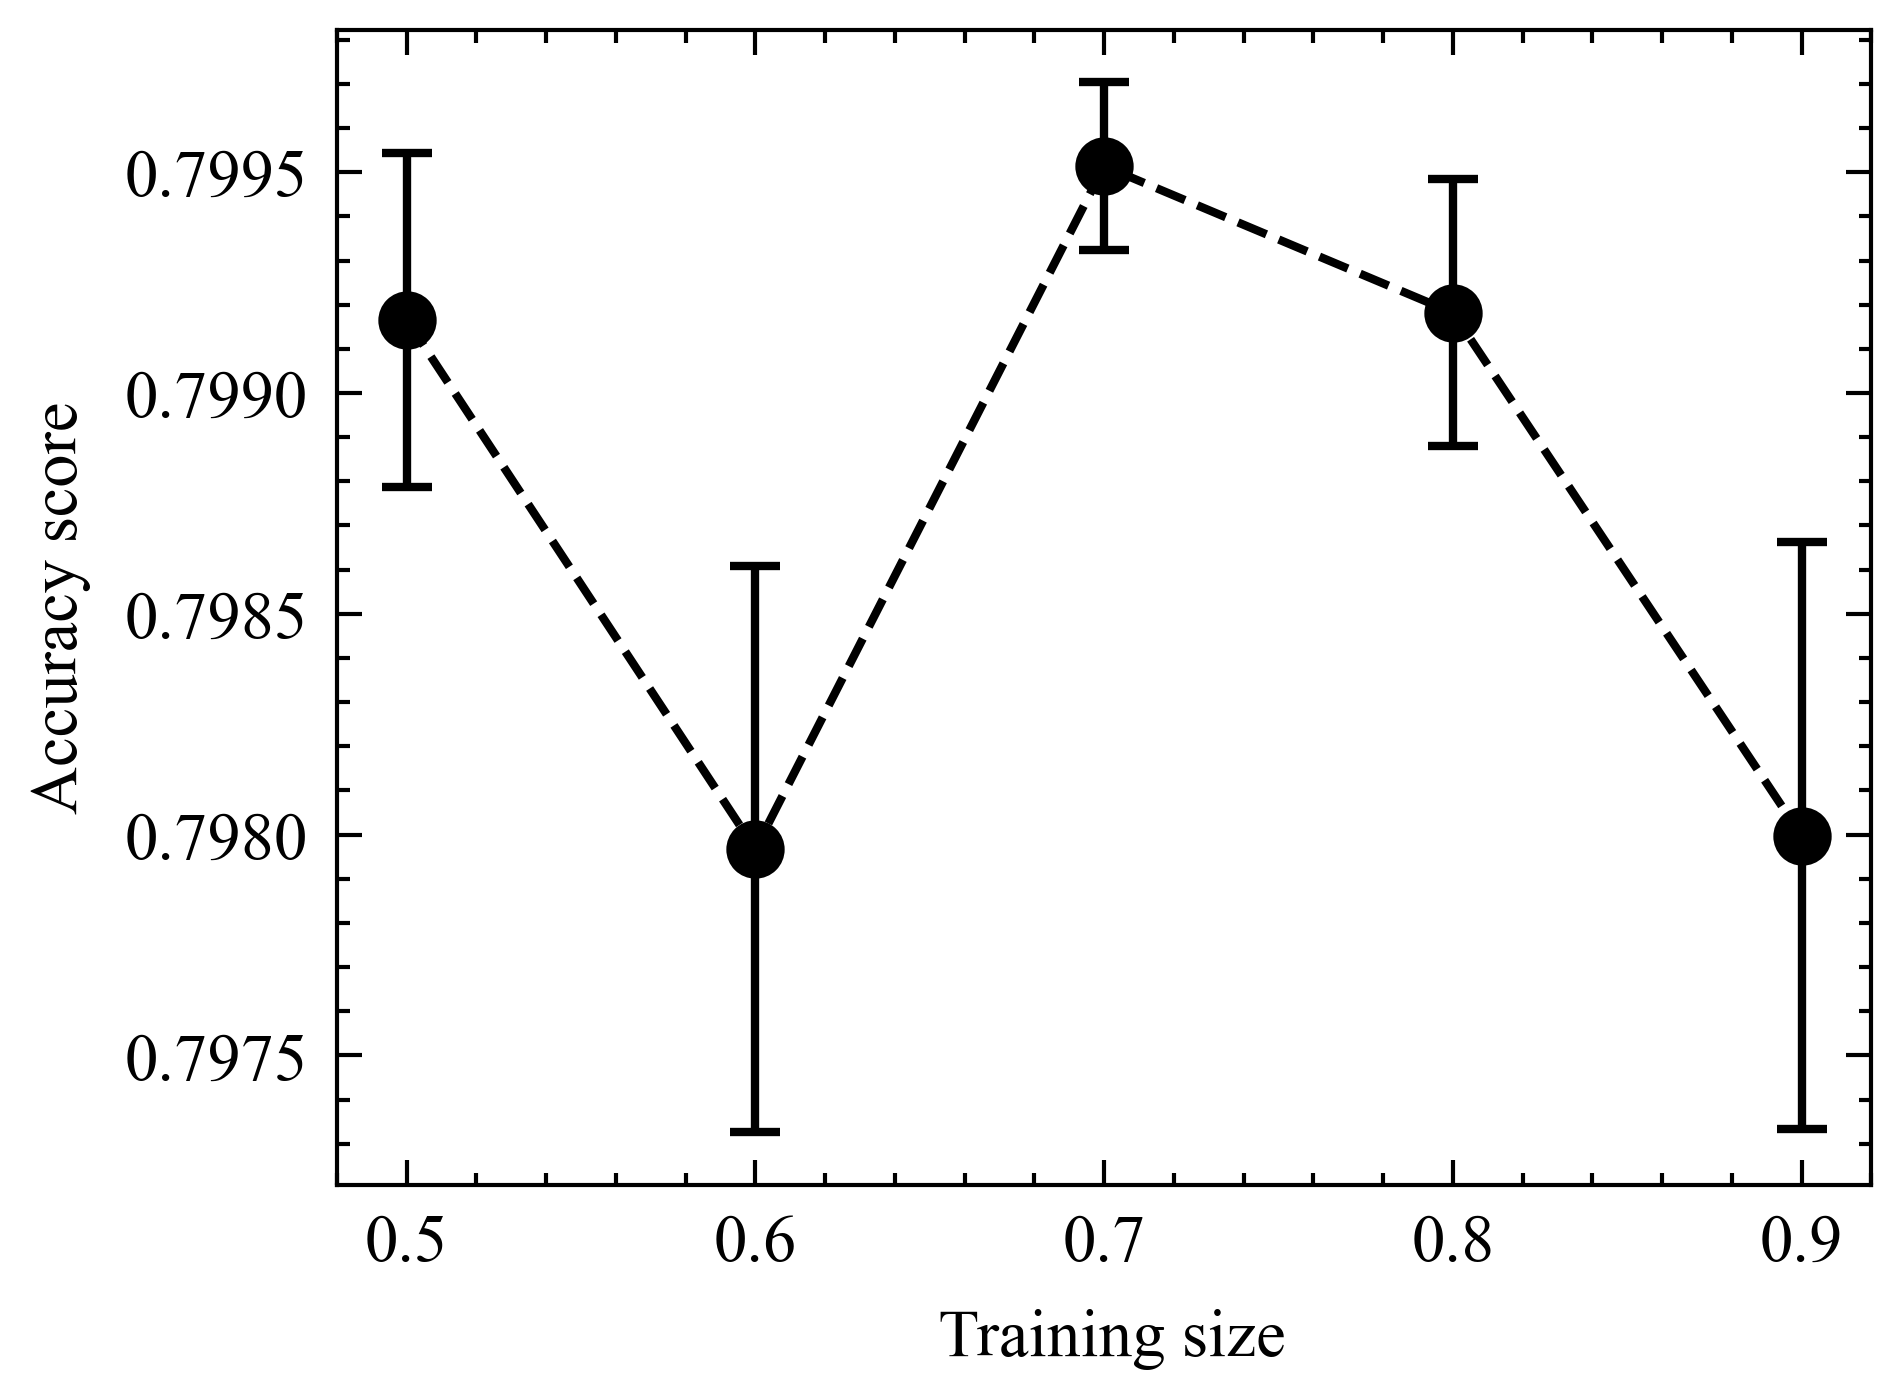

In [48]:
unpickled_y2_bow_al = utils.load_pickle_file_to_df('NN_AL_BOW_trainsize_accuracy_sem_1000ephs_y2', dir_name_e)
acc_y2_plot = plot(unpickled_y2_bow_al['trainsize'], unpickled_y2_bow_al['accuracy'], unpickled_y2_bow_al['sem'])

In [41]:

acc_y2_tfidf_al          = NN_dataframe(wordvec_counts, y_t2_al, train_sizes, 1000, 'AL', 'TFIDF', 'y2', dir_name_e)
acc_y2_tfidf_al_df       = acc_y2_tfidf_al [0]
acc_tfidf_y2_al           = acc_y2_tfidf_al[1]

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                109040    
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
 flatten_11 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 109,061
Trainable params: 109,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 168ms/step - loss: 0.9957 - accuracy: 0.5366 - val_loss: 1.1803 - val_accuracy: 0.8000
Epoch 2/1000
2/2 [==============================] - 0s 31ms/step - loss: 1.0807 - accuracy: 0.8000 - val_loss: 0.8226 - val_accuracy: 0.8000
Epoch 3/1000
2/2 [==========

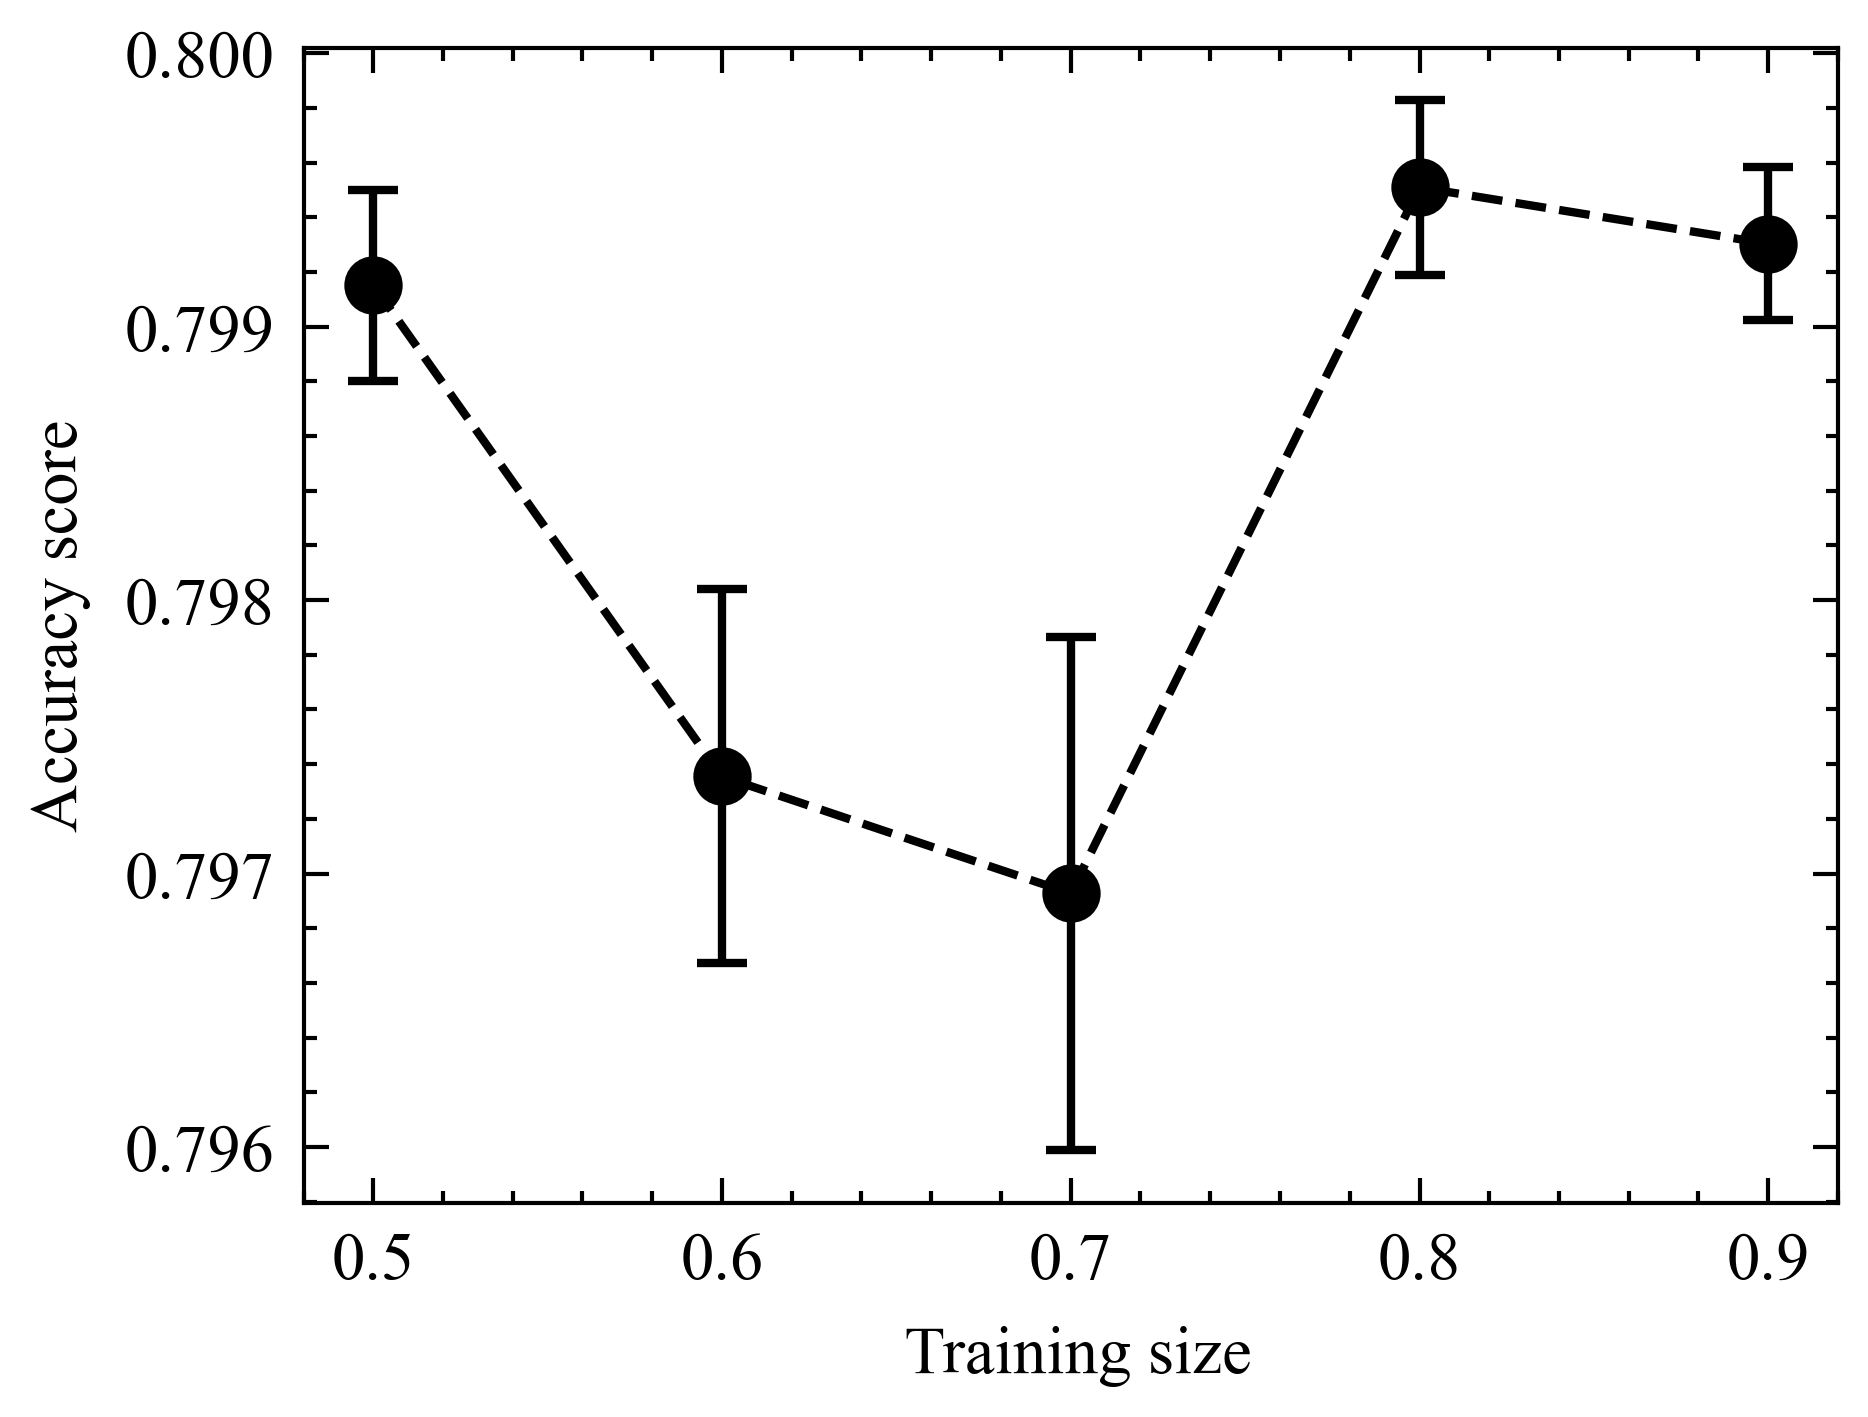

In [49]:
unpickled_y2_tfidf_al = utils.load_pickle_file_to_df('NN_AL_TFIDF_trainsize_accuracy_sem_1000ephs_y2', dir_name_e)
acc_y2_plot = plot(unpickled_y2_tfidf_al['trainsize'], unpickled_y2_tfidf_al['accuracy'], unpickled_y2_tfidf_al['sem'])

In [135]:
acc_y2_tfidf_rl          = NN_dataframe(wordvec_counts, y_t2, train_sizes, 1000, 'RL', 'TFIDF', 'y2', dir_name_e)
acc_y2_tfidf_rl_df       = acc_y2_tfidf_rl[0]
acc_tfidf_y2_rl          = acc_y2_tfidf_rl[1]

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_229 (Dense)           (None, 10)                54520     
                                                                 
 dense_230 (Dense)           (None, 1)                 11        
                                                                 
 flatten_112 (Flatten)       (None, 1)                 0         
                                                                 
Total params: 54,531
Trainable params: 54,531
Non-trainable params: 0
_________________________________________________________________


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})

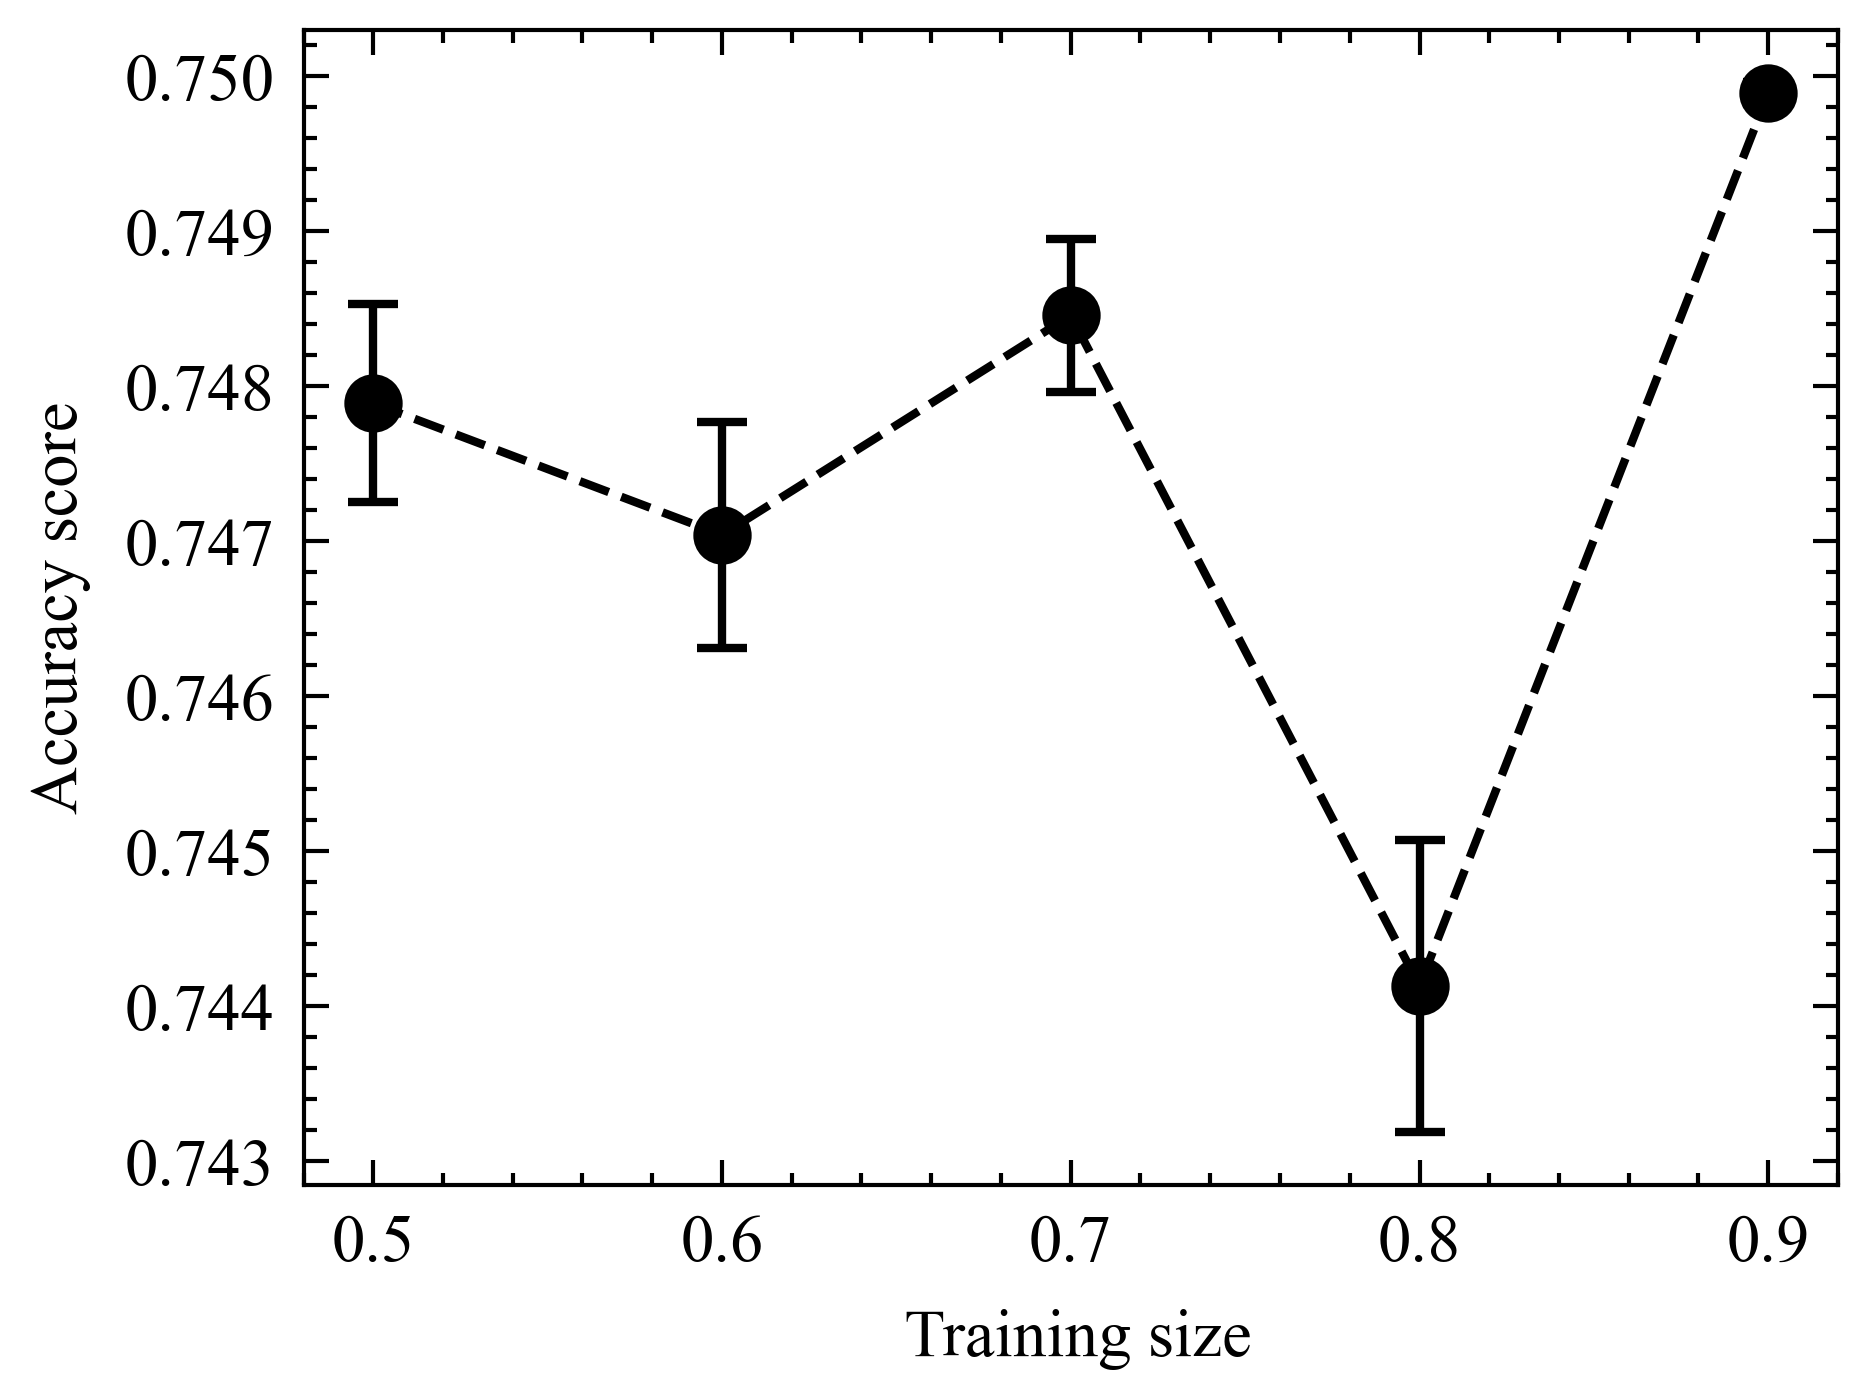

In [50]:
unpickled_y2_tfidf_rl = utils.load_pickle_file_to_df('NN_RL_TFIDF_trainsize_accuracy_sem_1000ephs_y2', dir_name_e)
acc_y2_plot = plot(unpickled_y2_tfidf_rl['trainsize'], unpickled_y2_tfidf_rl['accuracy'], unpickled_y2_tfidf_rl['sem'])

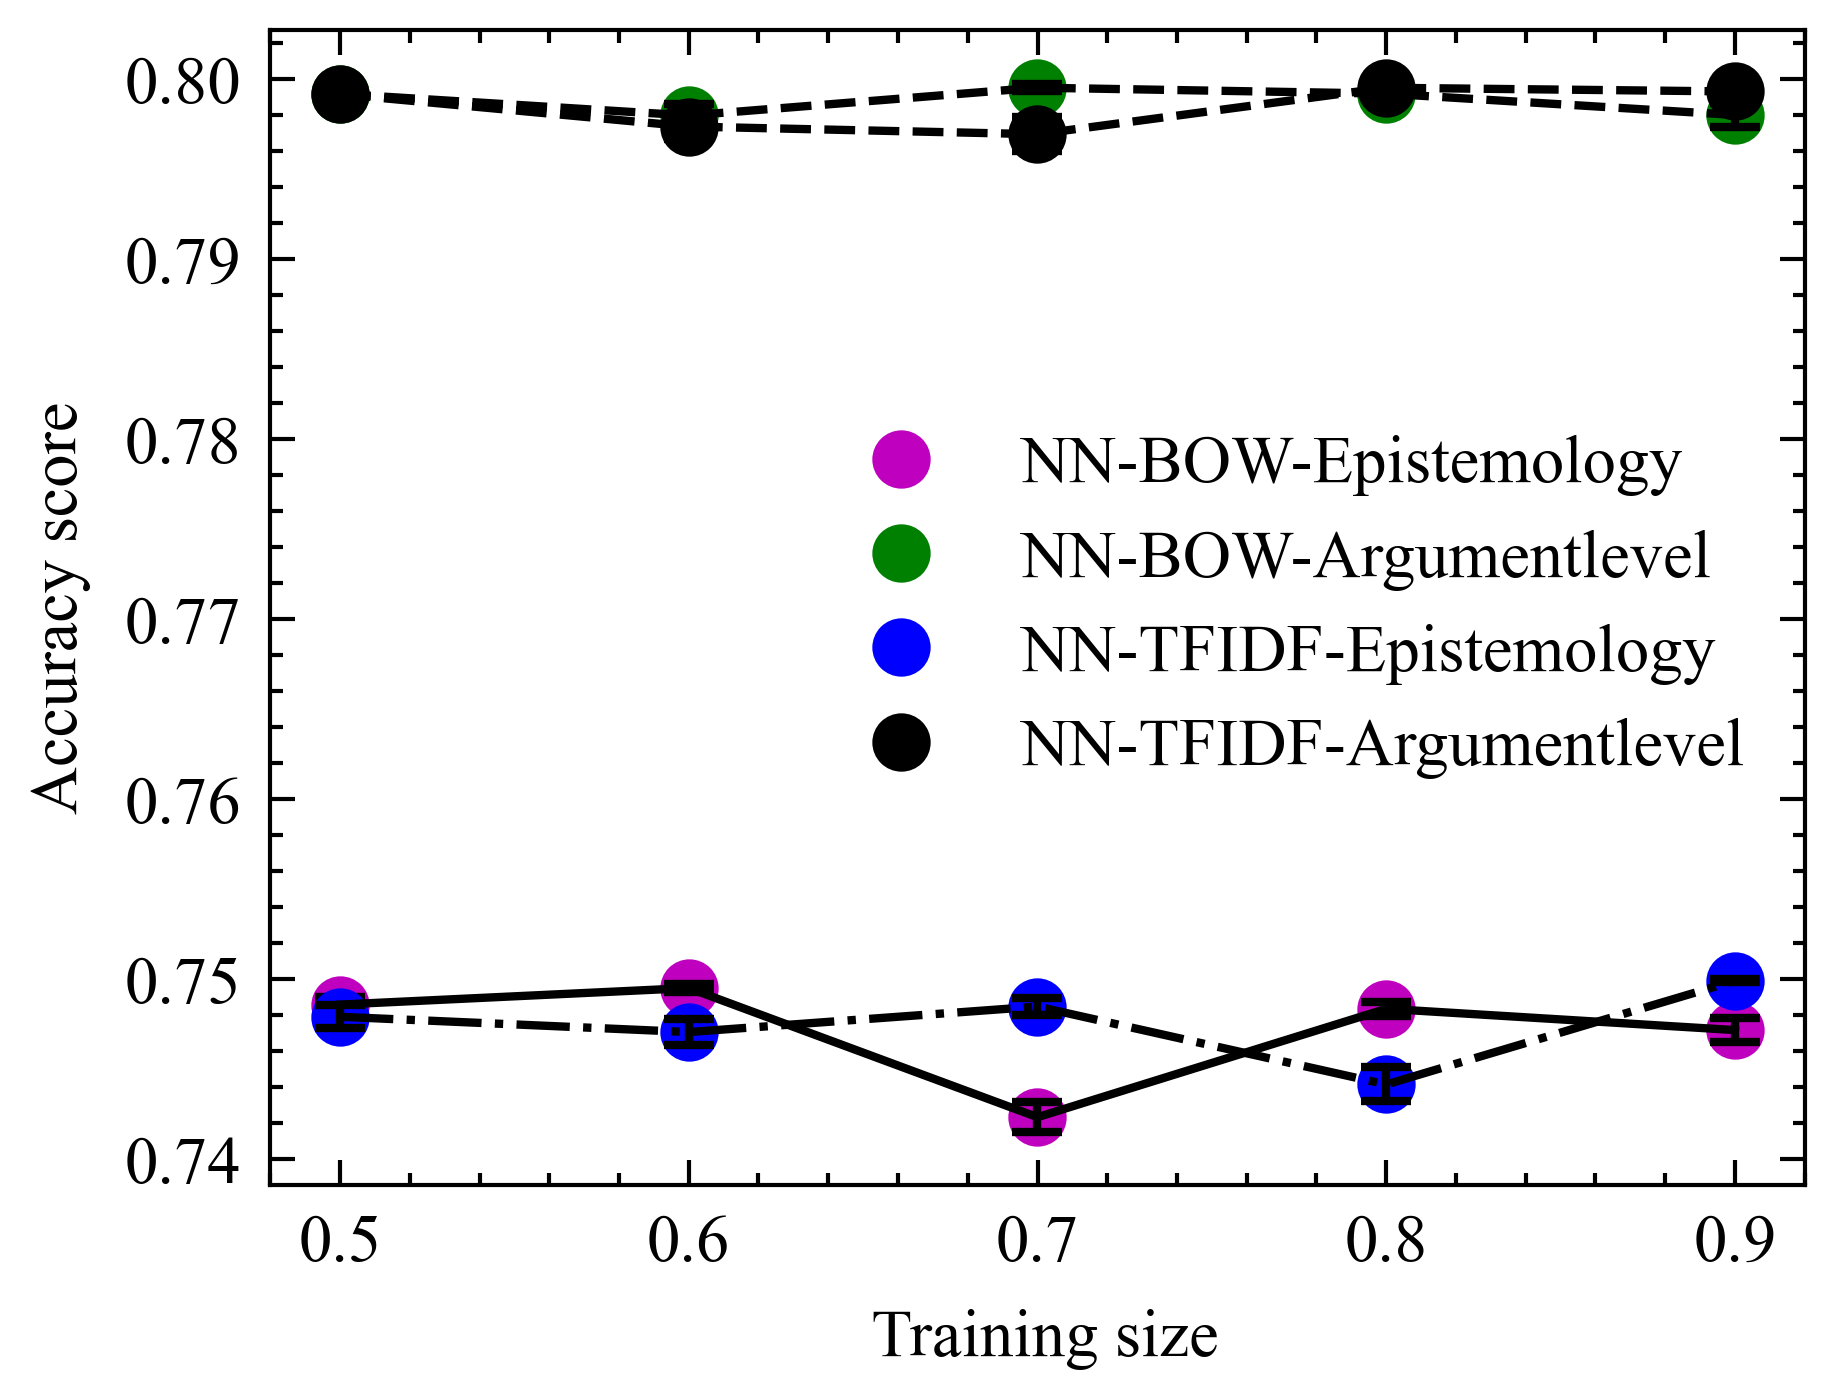

In [59]:
# --- All graphs on one plot#

plt.plot(unpickled_y2_bow['trainsize'], unpickled_y2_bow['accuracy'], 'o', label = 'NN-BOW-Epistemology', color = 'm')
plt.errorbar(unpickled_y2_bow['trainsize'], unpickled_y2_bow['accuracy'], yerr = unpickled_y2_bow['sem'], markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(unpickled_y2_bow_al['trainsize'], unpickled_y2_bow_al['accuracy'], 'o', label = 'NN-BOW-Argumentlevel', color = 'g')
plt.errorbar(unpickled_y2_bow_al['trainsize'], unpickled_y2_bow_al['accuracy'], yerr =  unpickled_y2_bow_al['sem'], markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(unpickled_y2_tfidf_rl['trainsize'],unpickled_y2_tfidf_rl['accuracy'], 'o', label = 'NN-TFIDF-Epistemology')
plt.errorbar(unpickled_y2_tfidf_rl['trainsize'], unpickled_y2_tfidf_rl['accuracy'], yerr = unpickled_y2_tfidf_rl['sem'], markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(unpickled_y2_tfidf_al['trainsize'], unpickled_y2_tfidf_al['accuracy'], 'o', label = 'NN-TFIDF-Argumentlevel')
plt.errorbar(unpickled_y2_tfidf_al['trainsize'],  unpickled_y2_tfidf_al['accuracy'], yerr =  unpickled_y2_tfidf_al['sem'], markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('TF-IDF - RL - NN - 1000 epochs')
plt.legend()
#filepath = 'outputs/NN-tfidf-AL-1000 epoch'
#plt.savefig(filepath)

# Year 1 & 2 combined

In [137]:
# import the yr2 labels
dir_csv3 = 'outputs/labels_cleaned_y1y2.csv'
df3 = pd.read_csv(dir_csv3, encoding='utf-8')

# -- TF-IDF, RL ---
X_tfidf_rl_y1y2 = np.array(ml_tools.tf_idf(df3['Content'].tolist()), dtype = object)
X_tfidf_rl_y1y2  = X_tfidf_rl_y1y2 [1]
print(X_tfidf_rl_y1y2.shape[1])
y_tfidf_rl_y1y2  = df3['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_tfidf_rl_y1y2 )
y_tfidf_rl_y1y2  = lb.transform(y_tfidf_rl_y1y2 )
print('X_tfidf_rl:', X_tfidf_rl_y1y2.shape)
print('tfidf_rl:', len(y_tfidf_rl_y1y2))

#TF-IDF, AL
y_tfidf_al_y1y2  = np.array(df3['ArgumentLevel'].tolist(), dtype = object)
lb = LabelBinarizer()
lb.fit(y_tfidf_al_y1y2)
y_tfidf_al_y1y2= lb.transform(y_tfidf_al_y1y2)
print('tfidf_al:', len(y_tfidf_al_y1y2))

# -- Bag of Words, RL ---
wordvec_names, wordvec_counts= ml_tools.BoW(df3['Content'].tolist())
print('bow_wordveccount', wordvec_counts.shape)
y_b3_rl = df3['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b3_rl)
y_b3_rl = lb.transform(y_b3_rl)
print('bow_rl:', len(y_b3_rl))

#--- Bag of words, AL --- 
y_b3_al = df3['ArgumentLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b3_al)
y_b3_al = lb.transform(y_b3_al)
print('bow_al:', len(y_b3_al))

7563
X_tfidf_rl: (178, 7563)
tfidf_rl: 178
tfidf_al: 178
bow_wordveccount (178, 7563)
bow_rl: 178
bow_al: 178


In [66]:
# ---- FE and ML labels used ----
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] 

In [126]:
#random 
def NN2(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(10, input_dim = 7563, activation  = 'relu'))
    model.add(layers.Dense(1, input_dim = 7563, activation = 'relu'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=1 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history

def NN_dataframe2(X, y,t_size,epoch_no,str_dataname,str_featext,str_year,dir):
    accuracies = []
    accuracies_sem = []
    loss = []
    dummy = []
    dummy_loss = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[0]
        print('X_train', X_train_b.shape)
        print('y_train', len(y_train_b))
        print(input)
        #input = len(y_train_b)
        nn1 = NN2(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])
        dummy_loss(nn1.hostory['loss'])
        

    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))
    
    for array in dummy_loss:
        loss.append(np.sum(array)/len(array))

    dict_rl = {'trainsize':train_sizes, 'accuracy':accuracies, 'sem': accuracies_sem, 'loss': loss}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow


def plot(dframe_train, dframe_acc, dframe_sem):
    plt.plot(dframe_train, dframe_acc, 'o')
    plt.errorbar(dframe_train, dframe_acc, yerr = dframe_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')

    # save figure 
    # filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
    # plt.savefig(filepath)
    return


# whenever you have a dimensions incompatible error, you just have to readapt the the dimension number to the 
# dimesion that is found. 
# OMG!!! This is amazing !! never forget this !! YAAYAYAYAYAAYAYYAAYAYAYYAY!!!

### A. TF-IDF -  RL

X_train (89, 7563)
y_train 89
89
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                75640     
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
 flatten_29 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 75,651
Trainable params: 75,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
89/89 [==============================] - 1s 5ms/step - loss: 2.1585 - accuracy: 0.7500 - val_loss: 0.5735 - val_accuracy: 0.7500
Epoch 2/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7500 - val_loss: 0.5630 - val_accuracy: 0.7

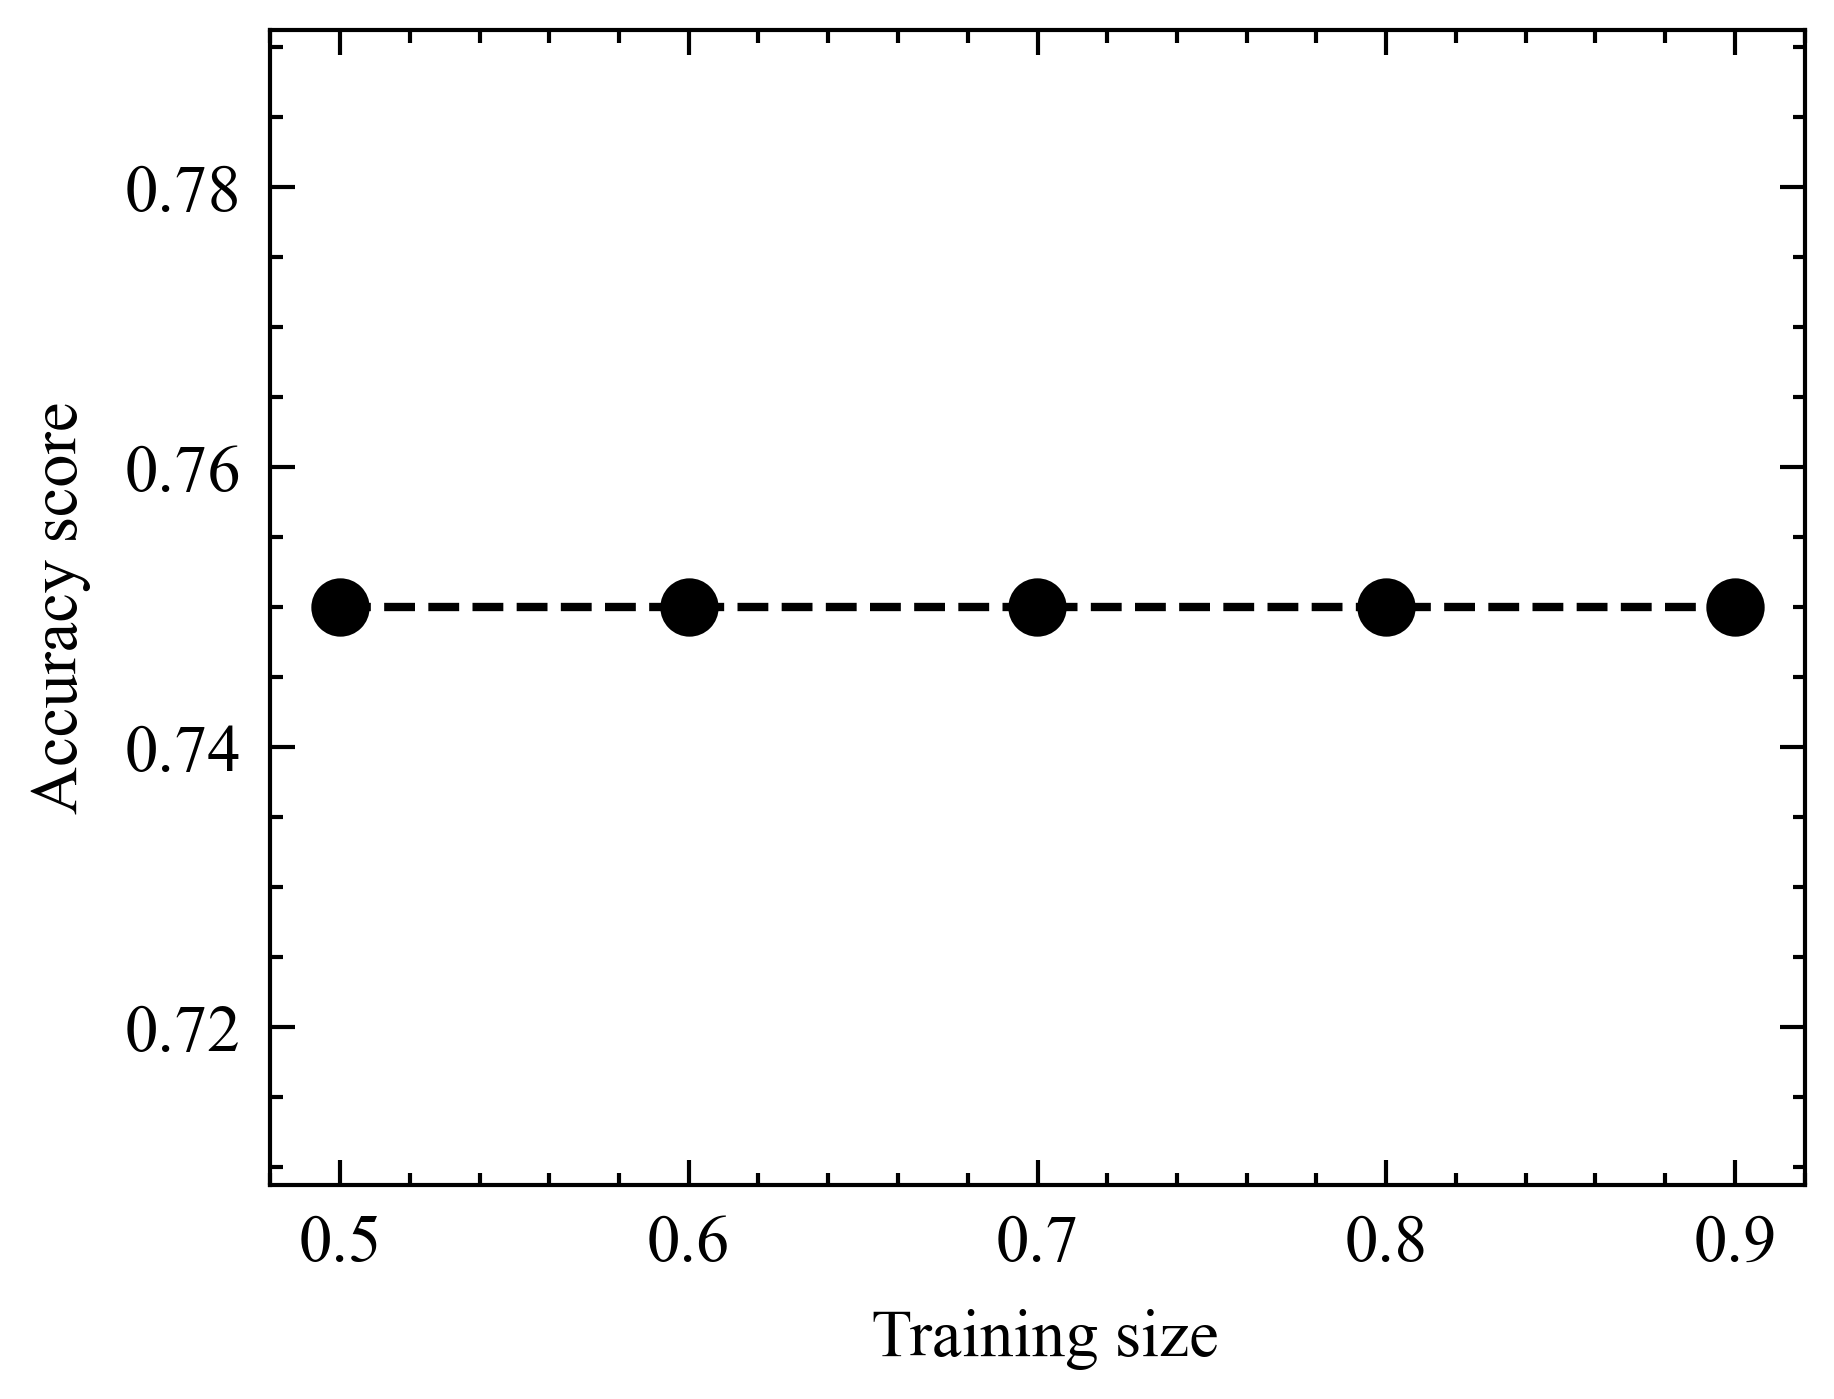

In [127]:
acc_y1y2_rl_t3_df            = NN_dataframe2(X_tfidf_rl_y1y2, y_tfidf_rl_y1y2, train_sizes, 1000, 'RL', 'TFIDF', 'y1y2', dir_name_e)

In [ ]:
unpickled_y1y2_t3_rl         = utils.load_pickle_file_to_df('NN_RL_TFIDF_trainsize_accuracy_sem_1000ephs_y1y2', dir_name_e)
acc_y1y2_plot                = plot(unpickled_y1y2_t3_rl['trainsize'],unpickled_y1y2_t3_rl['accuracy'], unpickled_y1y2_t3_rl['sem'])

In [131]:
acc_y1y2_al           = NN_dataframe2(X_tfidf_rl_y1y2, y_tfidf_al_y1y2, train_sizes, 1000, 'AL', 'TFIDF', 'y1y2', dir_name_e)
#acc_y1y2_al_df        = acc_y1y2_al[0]


X_train (89, 7563)
y_train 89
89
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                75640     
                                                                 
 dense_81 (Dense)            (None, 1)                 11        
                                                                 
 flatten_40 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 75,651
Trainable params: 75,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
89/89 [==============================] - 1s 5ms/step - loss: 0.6281 - accuracy: 0.8000 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 2/1000
89/89 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8000 - val_loss: 0.5009 - val_accuracy: 0.8

KeyError: 0

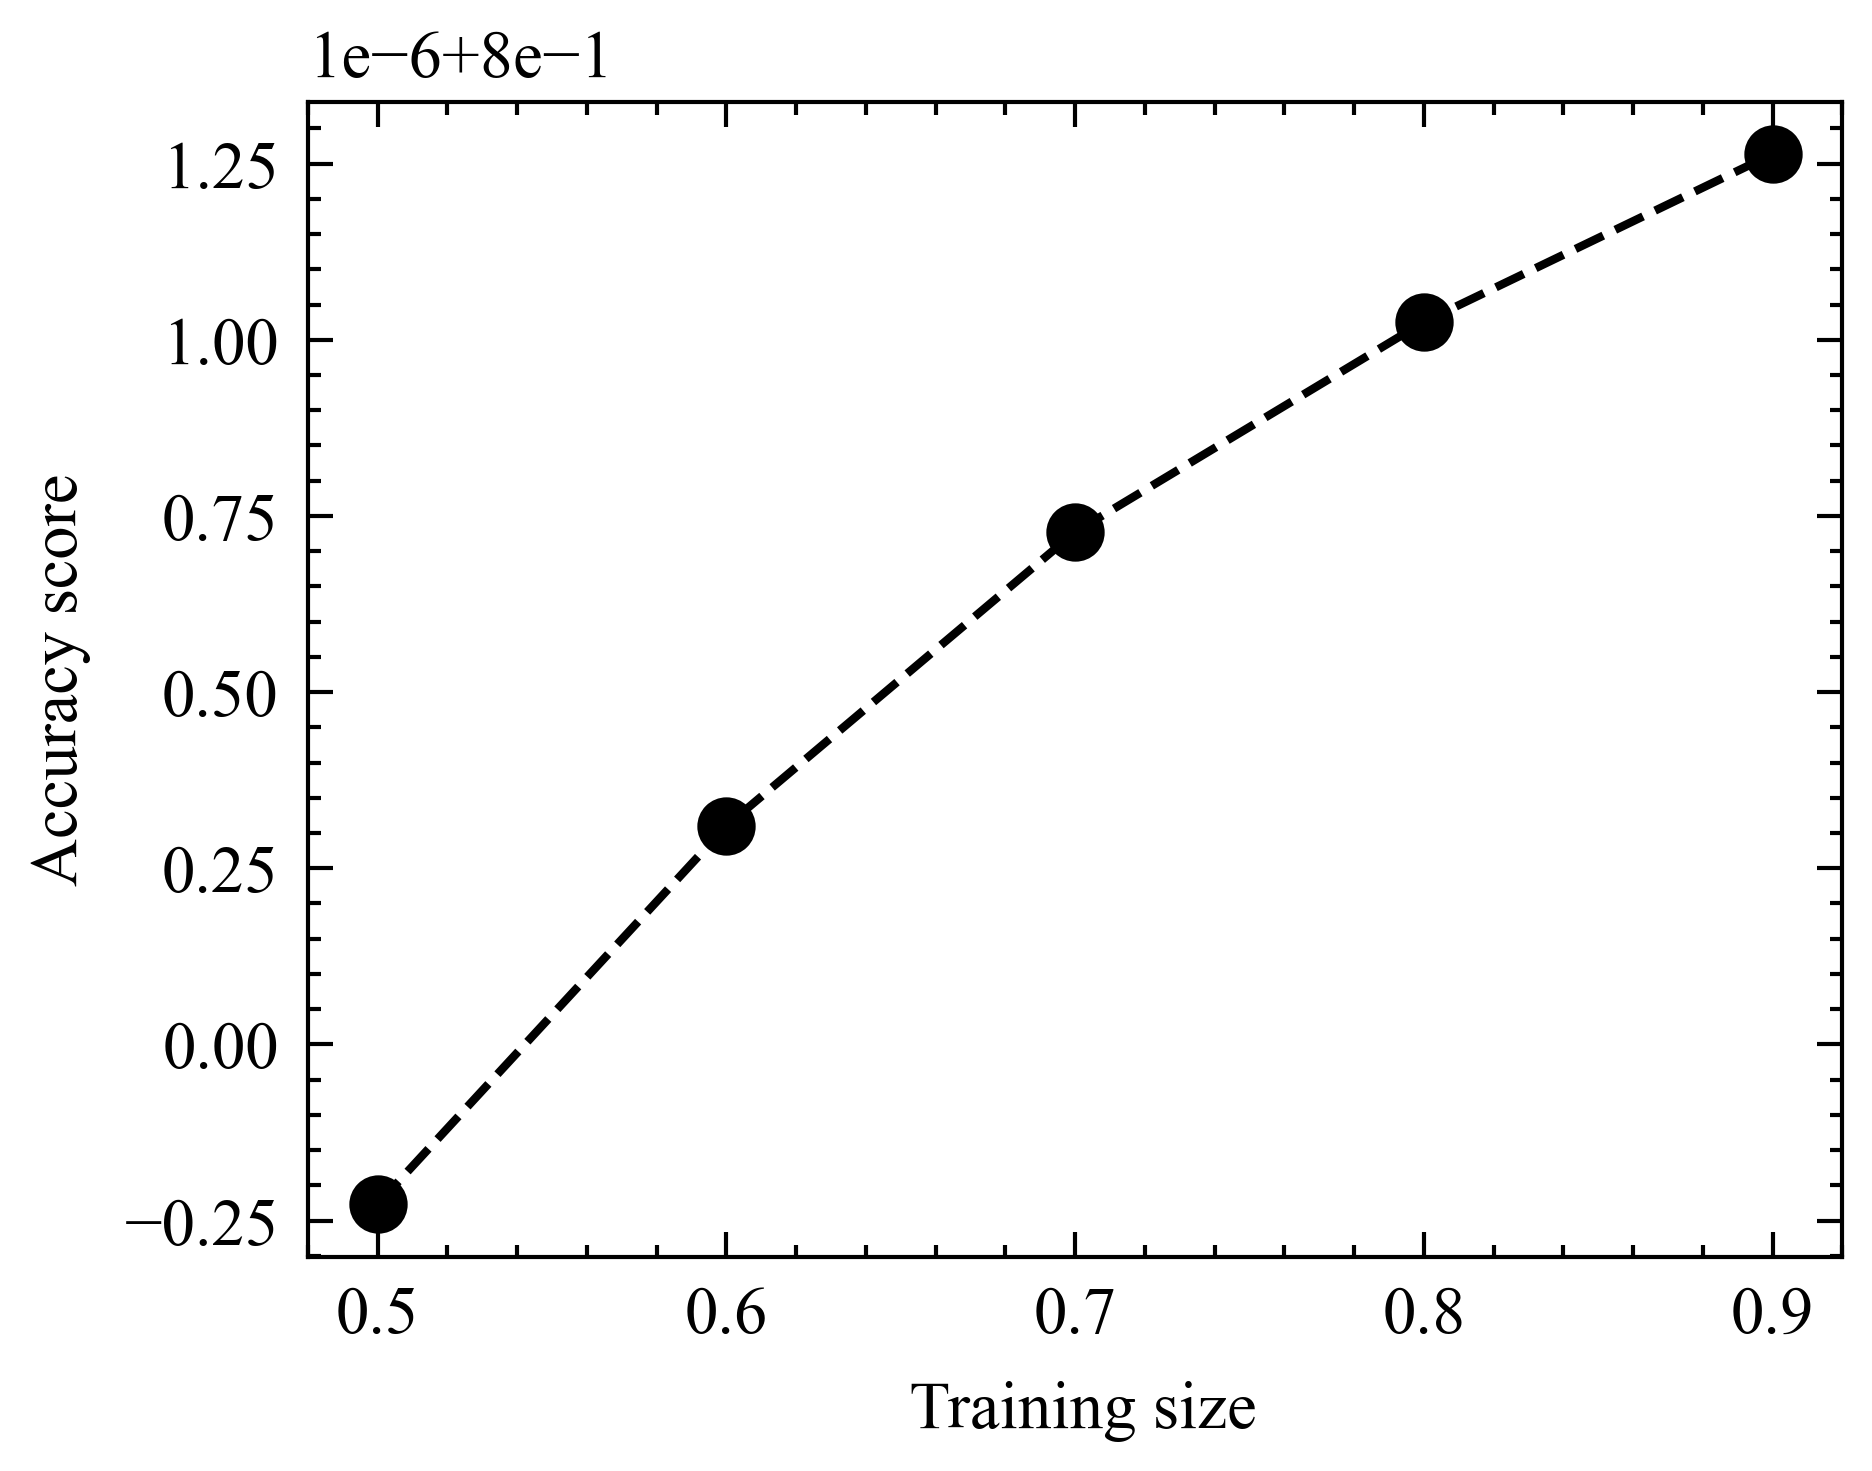

In [132]:
unpickled_y1y2_t3_al  = utils.load_pickle_file_to_df('NN_AL_TFIDF_trainsize_accuracy_sem_1000ephs_y1y2', dir_name_e)
acc_y1y2_plot_t3_al        = plot(unpickled_y1y2_t3_al['trainsize'], unpickled_y1y2_t3_al['accuracy'], unpickled_y1y2_t3_al['sem'])

   trainsize  accuracy  sem
0        0.5  0.800000  0.0
1        0.6  0.800000  0.0
2        0.7  0.800001  0.0
3        0.8  0.800001  0.0
4        0.9  0.800001  0.0


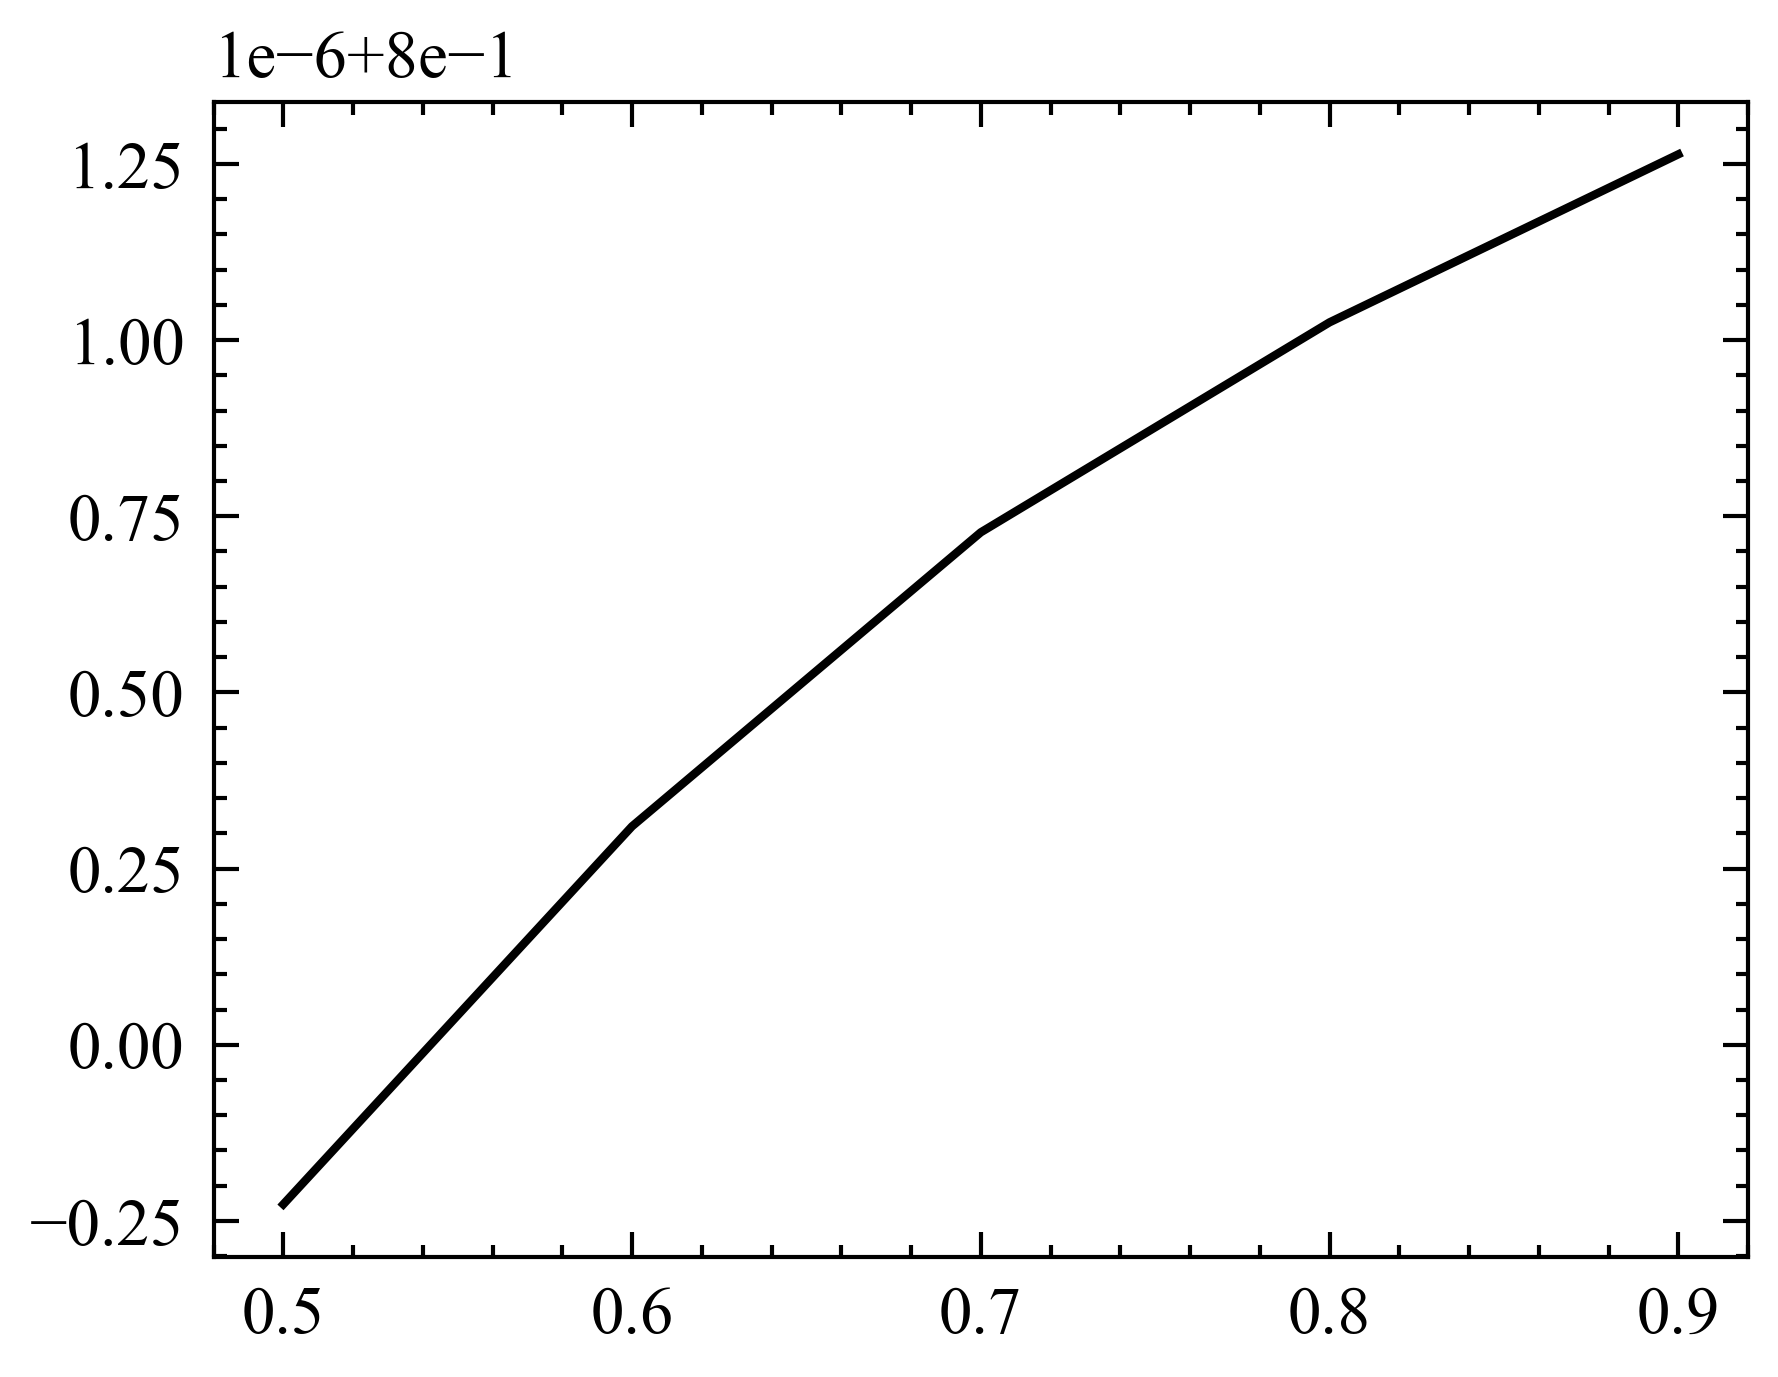

In [134]:
print(unpickled_y1y2_t3_al)
plt.plot(unpickled_y1y2_t3_al['trainsize'], unpickled_y1y2_t3_al['accuracy'])

In [138]:
acc_bow_y1y2_al           = NN_dataframe2(wordvec_counts,y_b3_al,train_sizes, 1000, 'AL', 'BOW', 'y1y2', dir_name_e)

X_train (89, 7563)
y_train 89
89
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 10)                75640     
                                                                 
 dense_95 (Dense)            (None, 1)                 11        
                                                                 
 flatten_47 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 75,651
Trainable params: 75,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
89/89 [==============================] - 2s 12ms/step - loss: 6.4165 - accuracy: 0.5573 - val_loss: 7.3551 - val_accuracy: 0.5101
Epoch 2/1000
89/89 [==============================] - 0s 5ms/step - loss: 7.1813 - accuracy: 0.5303 - val_loss: 7.3544 - val_accuracy: 0.

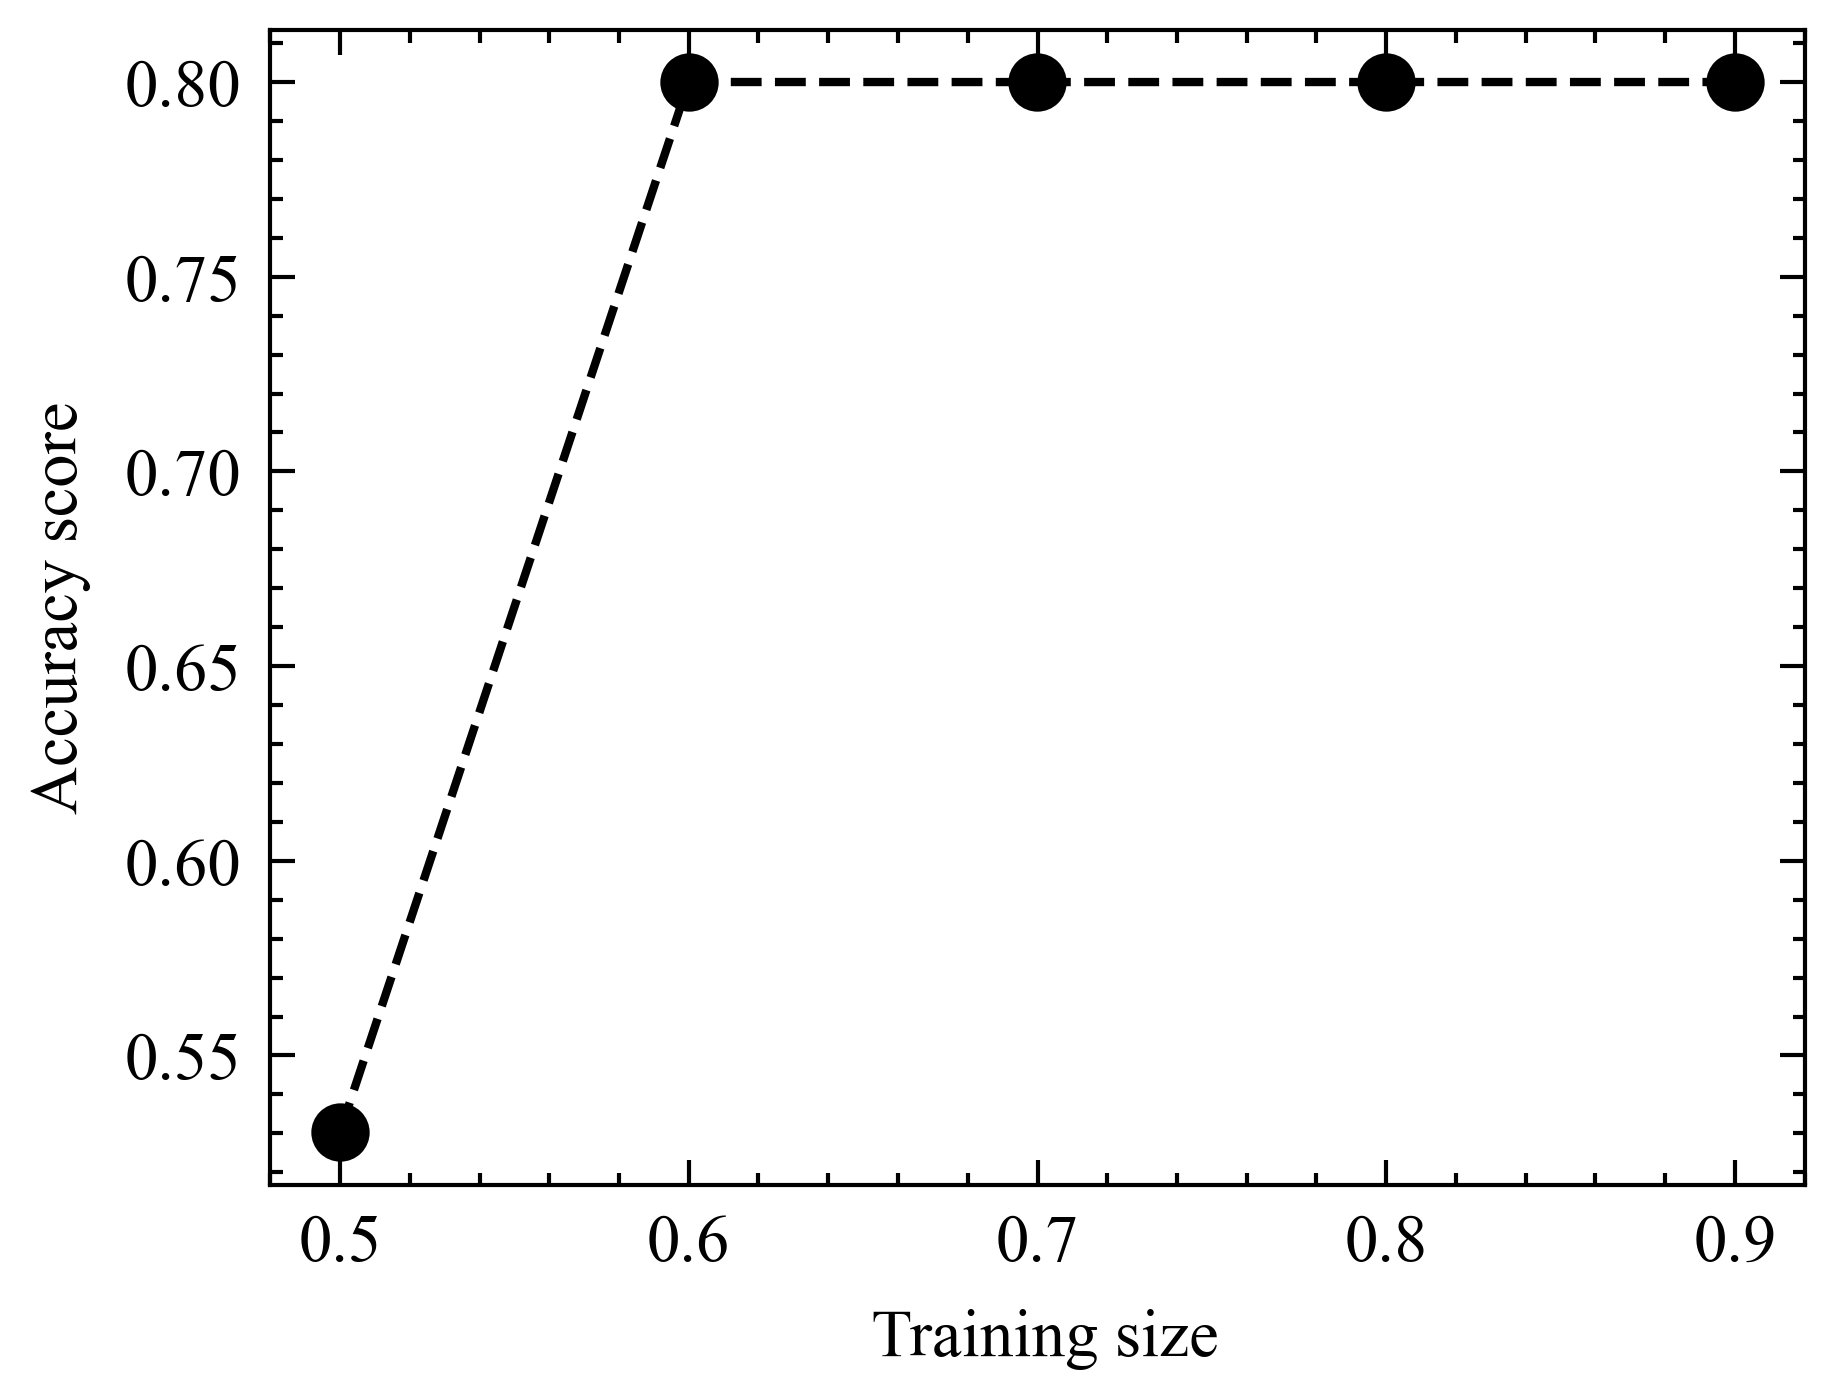

In [140]:
unpickled_y1y2_b3_al    = utils.load_pickle_file_to_df('NN_AL_BOW_trainsize_accuracy_sem_1000ephs_y1y2', dir_name_e)
acc_y1y2_plot_b3        = plot(unpickled_y1y2_b3_al['trainsize'], unpickled_y1y2_b3_al['accuracy'], unpickled_y1y2_b3_al['sem'])